In [1]:
import os
import Utilities.file_utilities as file_utils
import Utilities.DataProcessing.data_import as dp_utils
import Utilities.DataProcessing.signal_processing_utils as sigutils
import matplotlib.pyplot as plt
import Utilities.Plotting.plot_distributions_spectra as plt_spectra
import Utilities.Plotting.plotting_utilities as plt_utils

In [2]:
if __name__ == "__main__":
    # File paths
    hybridcosim_path = os.environ.get("HYBRIDCOSIM_REPO_PATH", "../../")
    csv_file_path = os.path.join(hybridcosim_path, "Data","AEE", "Resampled15min.csv")
    fig_save_path = os.path.join(hybridcosim_path, "DataAnalysis", "DataProcessingAEE","Solarhouse1","Figures")


    # Create output dir, read csv
    file_utils.create_dir(fig_save_path)
    data = dp_utils.import_data(csv_file_path)

In [3]:
    #df = df[7050:7800] # 16.04 - 23.04 data window to check the data, the whole year is too detailed
    #df = df[7400:7600]
    df = data[10000:10500]

In [4]:
    # Label definitions
    temperatures_sources = ["TSolStor", "TWPVL", "TOfenVL"]
    legend_temperatures_sources = ["Solar Supply Temperature","Oven Supply Temperature","Heat Pump Supply Temperature"]
    temperatures_sinks =["TFBHRL","TSchwimmbadVL"]
    legend_temperatures_sinks = ["Floor Heating Return Temperature", "Pool Supply Temperature"]
    input_temperatures = temperatures_sources + temperatures_sinks
    legend_input_temperatures = legend_temperatures_sources + legend_temperatures_sinks
    storage_tank_temperatures = ["TPuffero", "TPuffermo", "TPuffermu", "TPufferu"]
    legend_storage_tank_temperatures = ["Top Temperature (TPo)","Middle top temperature (TPmo)", "Middle bottom temperature (TPmo)","Bottom Temperature (TPu)"]
    curves_massflows_sources = ["VDSolarStorage", "VDWP", "VDOfen"]
    legend_massflows_sources = ["Solar", "Heat Pump", "Oven"]
    curves_massflows_sinks = ["VDStoragePool", "VDFBHSchwimmbad"]
    legend_massflows_sinks = ["Pool", "Floor Heating"]
    massflows = curves_massflows_sources + curves_massflows_sinks
    legend_massflows = legend_massflows_sources + legend_massflows_sinks

    #################################### Distributions #################################################################

### Histograms

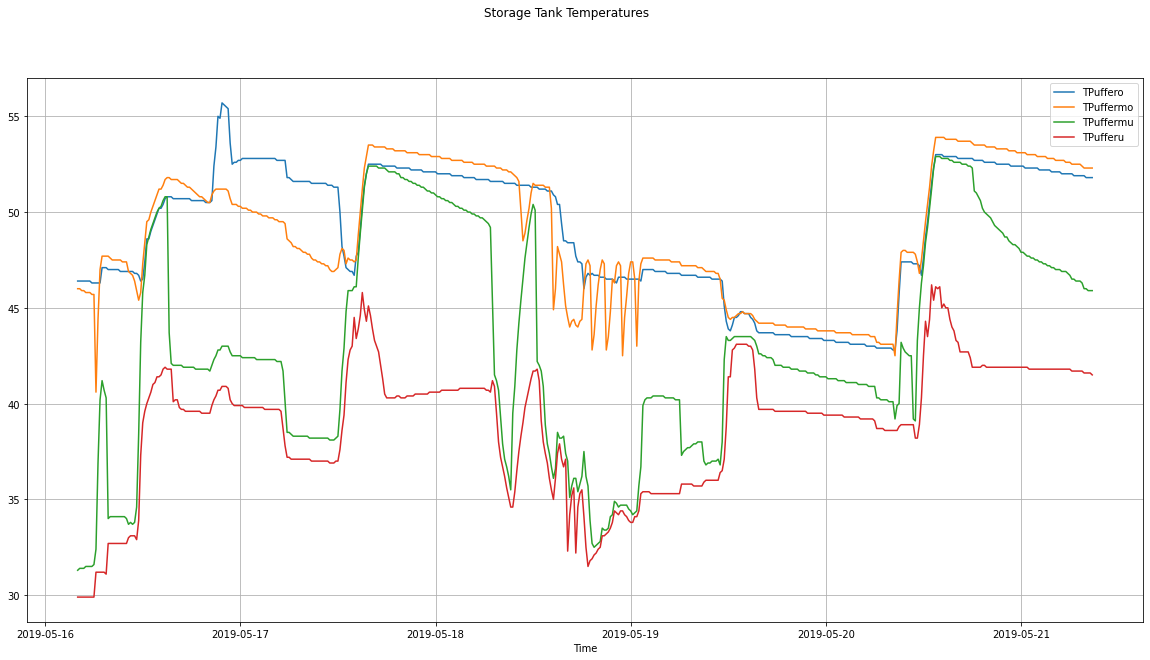

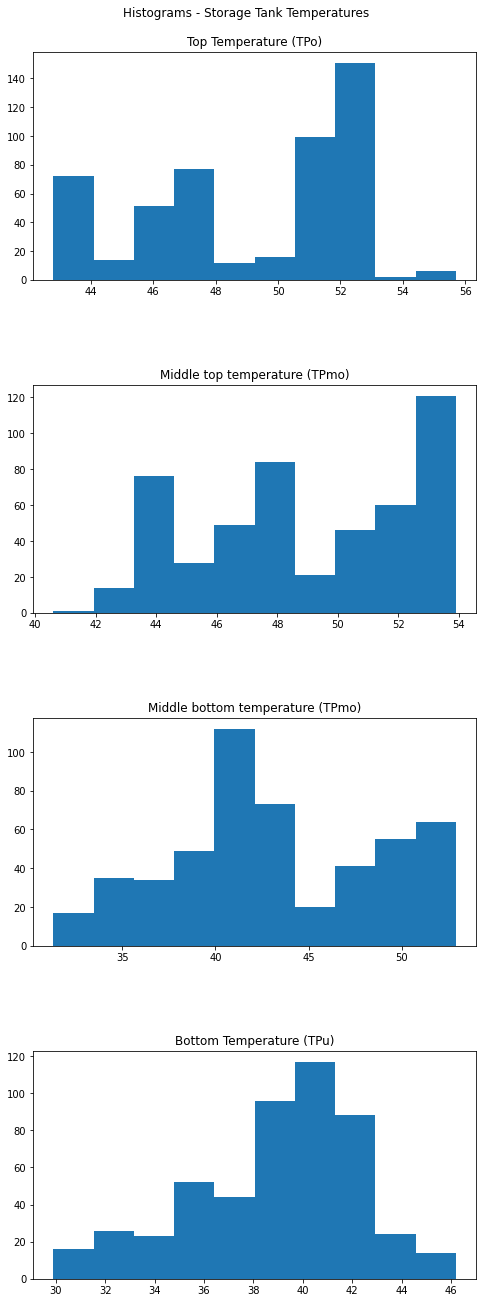

In [5]:
    # Storage Tank temperatures
    plt_utils.plot_result(df[storage_tank_temperatures],fig_save_path, 'Storage Tank Temperatures')
    # Storage Tank Temperatures - Distribution
    plt_spectra.plot_histograms(df[storage_tank_temperatures],fig_save_path,"Histograms - Storage Tank Temperatures",legend_storage_tank_temperatures)

### Frequencies

In [6]:
    n_end = 24000 # Cut off faulty data in November and December
    n_start = 1000
    n_end = 18000
    n_end = 2000
    data_cut = data[n_start:n_end]

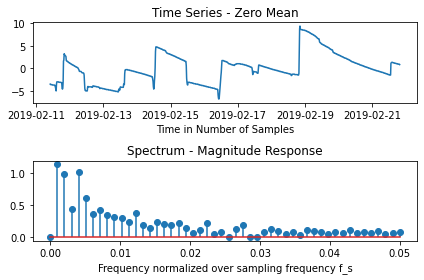

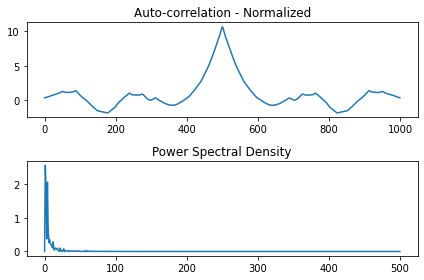

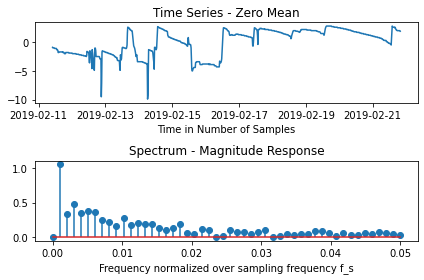

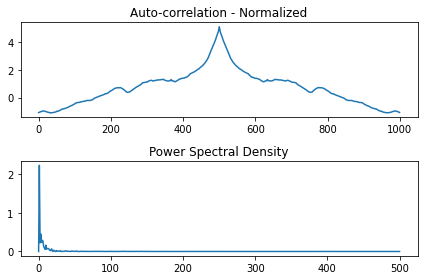

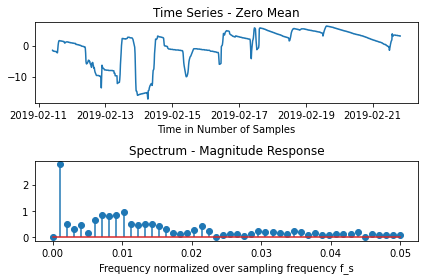

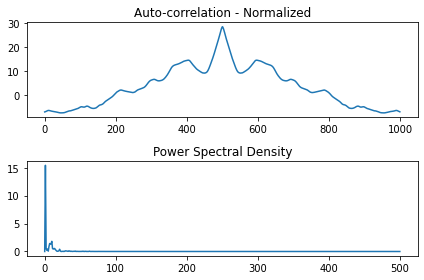

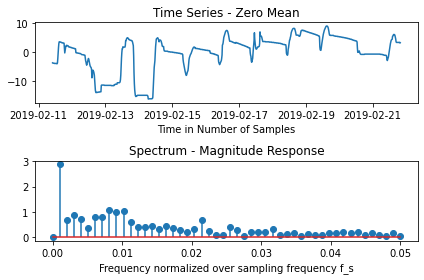

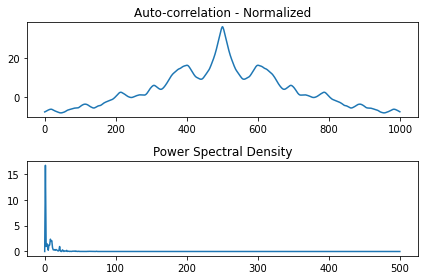

In [7]:
    plot_ac = True
    for feature in storage_tank_temperatures:
        data_normalized,_ = sigutils.remove_offset(data_cut[feature])
        fft_data = sigutils.fft_abs(data_normalized, 0.1)
        plt_spectra.plot_spectra(data_normalized, fft_data)
        if plot_ac:
            plt_spectra.plot_ac(*sigutils.xcorr_psd(data_normalized))

### Solar power - Lowpass filtered

D:\GitHub\TUG-CPS\hybridcosim\venv_39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


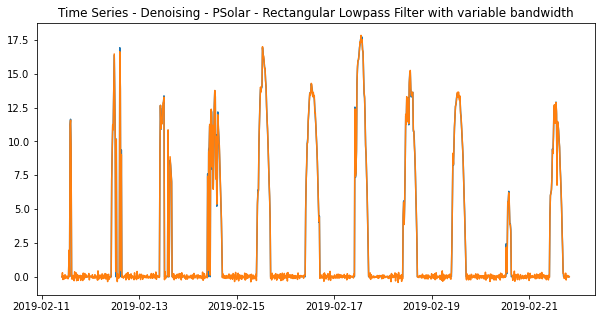

In [8]:
    solar_power = ["PSolar"]
    for feature in solar_power:
        df_fftthresh = sigutils.fft_threshold(data_cut[feature], 0.01)
        plt.figure(figsize=(10, 5))
        plt.title("Time Series - Denoising - " + feature + " - Rectangular Lowpass Filter with variable bandwidth")
        plt.plot(data_cut.index, data_cut[feature])
        plt.plot(data_cut.index, df_fftthresh)
        plt.show()
